In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdPartialCharges
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display

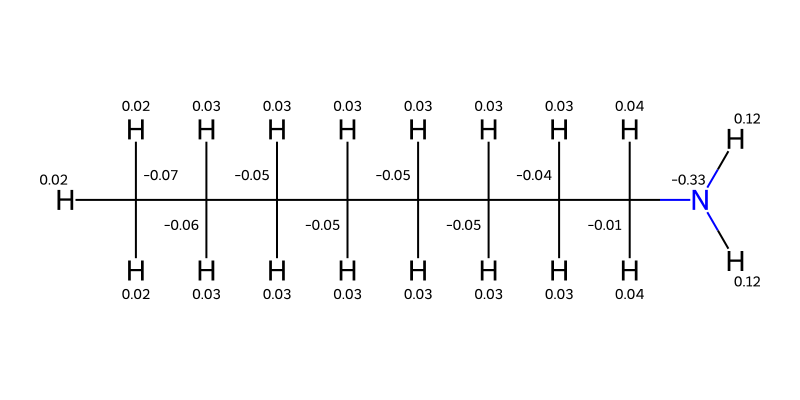

Partial Charges:
Atom 0 (C): -0.07
Atom 1 (C): -0.06
Atom 2 (C): -0.05
Atom 3 (C): -0.05
Atom 4 (C): -0.05
Atom 5 (C): -0.05
Atom 6 (C): -0.04
Atom 7 (C): -0.01
Atom 8 (N): -0.33
Atom 9 (H): 0.02
Atom 10 (H): 0.02
Atom 11 (H): 0.02
Atom 12 (H): 0.03
Atom 13 (H): 0.03
Atom 14 (H): 0.03
Atom 15 (H): 0.03
Atom 16 (H): 0.03
Atom 17 (H): 0.03
Atom 18 (H): 0.03
Atom 19 (H): 0.03
Atom 20 (H): 0.03
Atom 21 (H): 0.03
Atom 22 (H): 0.03
Atom 23 (H): 0.03
Atom 24 (H): 0.04
Atom 25 (H): 0.04
Atom 26 (H): 0.12
Atom 27 (H): 0.12


In [10]:
# SMILES string of L-histidine (neutral form)
smiles = 'CCCCCCCCN'

# Create RDKit molecule object from SMILES
mol = Chem.MolFromSmiles(smiles)

# Add hydrogens (important for partial charge computation)
mol = Chem.AddHs(mol)

# Compute Gasteiger partial charges
rdPartialCharges.ComputeGasteigerCharges(mol)

# Extract partial charges
charges = [float(atom.GetProp('_GasteigerCharge')) for atom in mol.GetAtoms()]

# Prepare 2D coordinates for drawing
AllChem.Compute2DCoords(mol)

# Draw molecule with partial charges using atomNote
drawer = rdMolDraw2D.MolDraw2DSVG(800, 400)

# Set the charge values as atom notes (appears in smaller font below atom)
for i, atom in enumerate(mol.GetAtoms()):
    mol.GetAtomWithIdx(i).SetProp('atomNote', f'{charges[i]:.2f}')

drawer.DrawMolecule(mol)
drawer.FinishDrawing()

svg = drawer.GetDrawingText()

# Display the SVG image
display(SVG(svg))

# Print partial charges for reference
print("Partial Charges:")
for i, charge in enumerate(charges):
    print(f"Atom {i} ({mol.GetAtomWithIdx(i).GetSymbol()}): {charge:.2f}")
